In [ ]:
#Install libraries

#!pip install tweepy
#!pip install pycountry
#!pip install wordcloud


In [1]:
#Import libraries

from textblob import TextBlob
import tweepy #get text
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pycountry

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer


# Twitter API için kimlik doğrulama

In [ ]:
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Anahtar Kelime veya Hashtag ile Tweet Çekme

In [ ]:
# tags = ["koronavirus","korona","Covid-19","pandemi"]

tweet_list = []

keyword = input("Please enter keyword or tag to search: ")

noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

for tweet in tweets:
    if tweet.lang == "tr":
        tweet_list.append(tweet.text)


In [ ]:
df = pd.DataFrame(tweet_list)
df.to_excel(r"/Users/ulasarikaya/Desktop/korona.xlsx", index = False)

In [ ]:
df = pd.DataFrame(tweet_list)
df.head()

In [16]:
data = pd.read_excel("/Users/ulasarikaya/Desktop/asd.xlsx")  
data

0
0                                                                                                                                                                                                                                                                       rüyamda pandemi bitmişti
1                                                                                                                                                                          3 pandemi felaket yaşayan ülke türkiye hindistan brezilya üçünde de benzer hikayeler demokratik gerileme ve sağ popü…
2                                                                                                                                                     hapishanelerde alınan pandemi önlemleri sürekli bir tecrit haline dönüşmüştür tecrit de çocuklar için salgın korkunç bir hal kadar tehlik…
3                                                                                                                                                                                                                        tam kapanmaya saatler kaldı neler yasak kimler muaf nereler açık olacak
4                                                                                                                                                                                                                                     maske 😷 mesafe ↔️ temizlik 🧼 tedbirlerimizi alalım pandemi
...                                                                                                                                                                                                                                                                                          ...
2731                                                                                                                                      ewil_mind3d herşeyden subliminal mesaj alanlar, bu olanlara yorum yapmıyorlar. ölümcül bir virüs olsa, cumhurbaşkanı böyle bir tehlikeyi göze alır mı?
2732                                                                                                                                                                                                                    zatenyanmisim benim aşk hayatımı da bir virüs bitirdi ama covid değil...
2733    sizin bir yıl takamadığınız maskeleri doktorlar ve sağlıkçılar yüzyıllardır ameliyatlarda saatlerce takıyorlar! bu insanlar manyak mı ameliyata girerken süs olsun diye mi takıyorlar bu maskeleri?durumun ciddiyetinin farkına varın artık! ölümcül bir virüs var! #maskeleriyaktürkiye
2734      allah çarpsın ki 1 yıldır evden çıkmıyorum. sosyal fobimi besledi bu virüs, çöp atmaya bile gitmiyorum ya. ben artık deniz kenarında yürümek istiyorum. pikniğe gitmek, güneş tenime değince terlemek, hava almak istiyorum. i̇stisnasız herkesi katabilir miyiz o mücadeleye? lütfen.
2735  park ve bahçede yayılan virüs i̇ett otobüslerinde gayet mahçup akbil basıp bir kenarda oturuyor amcası. durağa geldimi iniyor yayılıyor çimenlere i̇mamoğlu başkan virüsle konuşmuş yayılmayacakmış otobüslerde söz vermiş yalnızca ak parti kongre yapınca yayılacakmış ekrem-20 meral-21

[2736 rows x 1 columns]

In [3]:
data.drop_duplicates(inplace = True)

data.reset_index(drop=True)

#unique tweets

0
0                              rüyamda pandemi bitmişti
1      3 pandemi felaket yaşayan ülke türkiye hindis...
2      hapishanelerde alınan pandemi önlemleri sürek...
3     tam kapanmaya saatler kaldı neler yasak kimler...
4     maske 😷 mesafe ↔️ temizlik 🧼 tedbirlerimizi al...
...                                                 ...
2153  ewil_mind3d herşeyden subliminal mesaj alanlar...
2154  zatenyanmisim benim aşk hayatımı da bir virüs ...
2155  sizin bir yıl takamadığınız maskeleri doktorla...
2156  allah çarpsın ki 1 yıldır evden çıkmıyorum. so...
2157  park ve bahçede yayılan virüs i̇ett otobüsleri...

[2158 rows x 1 columns]

# Duygu Analizi Yapabilmek İçin Tweetleri Temizliyoruz

In [4]:
import re

tw_list = pd.DataFrame(data)

tw_list["text"] = tw_list[0]


remove_rt = lambda x: re.sub('RT @\w+: '," ",x)

rt = lambda x: re.sub('[,\.!?();:$%&#"]', '', x)

tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()


In [5]:
import nltk 
from nltk.corpus import stopwords

WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')

def token(values):
    filtered_words = [word for word in values.split() if word not in stop_word_list]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc

docs = tw_list['text']

docs = docs.map(lambda x: token(x))
tw_list['text'] = docs


tw_list.head(10)

0  \
0                           rüyamda pandemi bitmişti   
1   3 pandemi felaket yaşayan ülke türkiye hindis...   
2   hapishanelerde alınan pandemi önlemleri sürek...   
3  tam kapanmaya saatler kaldı neler yasak kimler...   
4  maske 😷 mesafe ↔️ temizlik 🧼 tedbirlerimizi al...   
5  bu grafik koronavirüs'ten daha tehlikeli çünkü...   
6  koronavirüs aşısının miyokardite yol açtığını ...   
7  koronavirüs salgın korkunç bir halında can kay...   
8  ’20 metre i̇le 2 metre mesafe arasında fark yo...   
9   şanlıurfa'nın şanlıhaliliye ilçesinde çok say...   

                                                text  
0                           rüyamda pandemi bitmişti  
1  3 pandemi felaket yaşayan ülke türkiye hindist...  
2  hapishanelerde alınan pandemi önlemleri sürekl...  
3  tam kapanmaya saatler kaldı neler yasak kimler...  
4  maske 😷 mesafe ↔️ temizlik 🧼 tedbirlerimizi al...  
5  grafik koronavirüs'ten tehlikeli gıda fiyatlar...  
6  koronavirüs aşısının miyokardite yol açtığını ...  
7  koronavirüs salgın korkunç bir halında can kay...  
8  ’20 metre i̇le 2 metre mesafe arasında fark yo...  
9  şanlıurfa'nın şanlıhaliliye ilçesinde sayıda e...

In [6]:
tw_list.drop(0, inplace=True,axis =1)

In [7]:
from google_trans_new import google_translator  

translator = google_translator() 

tw_list['eng'] = tw_list['text'].apply(lambda x: translator.translate(x, lang_tgt='en',lang_src='tr'))

tw_list

text  \
0                              rüyamda pandemi bitmişti   
1     3 pandemi felaket yaşayan ülke türkiye hindist...   
2     hapishanelerde alınan pandemi önlemleri sürekl...   
3     tam kapanmaya saatler kaldı neler yasak kimler...   
4     maske 😷 mesafe ↔️ temizlik 🧼 tedbirlerimizi al...   
...                                                 ...   
2731  ewil_mind3d herşeyden subliminal mesaj alanlar...   
2732  zatenyanmisim benim aşk hayatımı bir virüs bit...   
2733  sizin bir yıl takamadığınız maskeleri doktorla...   
2734  allah çarpsın 1 yıldır evden çıkmıyorum sosyal...   
2735  park bahçede yayılan virüs i̇ett otobüslerinde...   

                                                    eng  
0                      In my dream pandem was finished   
1     3 Pandemiology Catastrophic Country Turkey Ind...  
2     Pandema measures taken in prisons have become ...  
3     Hours left to close to close What are the forb...  
4     Mask 😷 Distance ↔️ Cleaning 🧼 Let's take our m...  
...                                                 ...  
2731  ewil_mind3d they do not comment on those whose...  
2732  Already my love my love has finished my life a...  
2733  Masks that you are unable to wear a year The d...  
2734  Allah I have been out of house for 1 year I ha...  
2735  The park garden is pressed in the virus bustim...  

[2158 rows x 2 columns]

In [8]:
df2 = pd.DataFrame(tw_list)
df2.to_excel(r"/Users/ulasarikaya/Desktop/out2.xlsx", index = False)

# Duygu Analizi

In [73]:
#Calculating Negative, Positive, Neutral values using textblob lib

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

tw_list[['polarity', 'subjectivity']] = tw_list['eng'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


for index, row in tw_list['eng'].iteritems():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
        
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp


In [76]:
#tw_list.drop("eng", inplace=True , axis = 1)
#tw_list.reset_index(inplace= True)
pd.set_option('display.max_colwidth', None)
tw_list

index  \
0         0   
1         1   
2         2   
3         3   
4         4   
...     ...   
2153   2153   
2154   2154   
2155   2155   
2156   2156   
2157   2157   

                                                                                                                                                                                                                                                                                        text  \
0                                                                                                                                                                                                                                                                   rüyamda pandemi bitmişti   
1                                                                                                                                                                            3 pandemi felaket yaşayan ülke türkiye hindistan brezilya üçünde benzer hikayeler demokratik gerileme sağ popü…   
2                                                                                                                                                         hapishanelerde alınan pandemi önlemleri sürekli bir tecrit haline dönüşmüştür tecrit çocuklar salgın korkunç bir hal kadar tehlik…   
3                                                                                                                                                                                                                    tam kapanmaya saatler kaldı neler yasak kimler muaf nereler açık olacak   
4                                                                                                                                                                                                                                 maske 😷 mesafe ↔️ temizlik 🧼 tedbirlerimizi alalım pandemi   
...                                                                                                                                                                                                                                                                                      ...   
2153                                                                                                                                            ewil_mind3d herşeyden subliminal mesaj alanlar olanlara yorum yapmıyorlar ölümcül bir virüs olsa cumhurbaşkanı böyle bir tehlikeyi göze alır   
2154                                                                                                                                                                                                                          zatenyanmisim benim aşk hayatımı bir virüs bitirdi covid değil   
2155                      sizin bir yıl takamadığınız maskeleri doktorlar sağlıkçılar yüzyıllardır ameliyatlarda saatlerce takıyorlar insanlar manyak ameliyata girerken süs olsun mi takıyorlar maskeleridurumun ciddiyetinin farkına varın artık ölümcül bir virüs var maskeleriyaktürkiye   
2156                      allah çarpsın 1 yıldır evden çıkmıyorum sosyal fobimi besledi virüs çöp atmaya bile gitmiyorum ben artık deniz kenarında yürümek istiyorum pikniğe gitmek güneş tenime değince terlemek hava almak istiyorum i̇stisnasız herkesi katabilir miyiz mücadeleye lütfen   
2157  park bahçede yayılan virüs i̇ett otobüslerinde gayet mahçup akbil basıp bir kenarda oturuyor amcası durağa geldimi iniyor yayılıyor çimenlere i̇mamoğlu başkan virüsle konuşmuş yayılmayacakmış otobüslerde söz vermiş yalnızca ak parti kongre yapınca yayılacakmış ekrem-20 meral-21   

      polarity  subjectivity sentiment    neg    neu    pos  compound  
0     0.000000      0.000000  positive  0.000  0.714  0.286    0.2500  
1     0.142857      0.467857  negative  0.186  0.814  0.000   -0.4939  
2     0.000000      0.000000  negative  0.264  0.736  0.000   -0.7269  
3     0.000000      0.250000  negative  0.154  0.769  0.077   -0.3400  
4     0.

In [78]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [79]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [80]:
count_values_in_column(tw_list,"sentiment")

Total  Percentage
neutral     889       41.20
positive    657       30.44
negative    612       28.36

In [89]:
tw_list_negative

index  \
1         1   
2         2   
3         3   
5         5   
6         6   
...     ...   
2149   2149   
2150   2150   
2153   2153   
2155   2155   
2156   2156   

                                                                                                                                                                                                                                                                    text  \
1                                                                                                                                                        3 pandemi felaket yaşayan ülke türkiye hindistan brezilya üçünde benzer hikayeler demokratik gerileme sağ popü…   
2                                                                                                                                     hapishanelerde alınan pandemi önlemleri sürekli bir tecrit haline dönüşmüştür tecrit çocuklar salgın korkunç bir hal kadar tehlik…   
3                                                                                                                                                                                                tam kapanmaya saatler kaldı neler yasak kimler muaf nereler açık olacak   
5                                                                                                                                                                                                grafik koronavirüs'ten tehlikeli gıda fiyatları dünyada giderek artıyor   
6                                                                                                                                                                                            koronavirüs aşısının miyokardite yol açtığını gösteren bir kanıt bulunmuyor   
...                                                                                                                                                                                                                                                                  ...   
2149                                                                                                                                                  toplumumuz risk oluşturan virüs değil sonunda distopik demokratik olmayan bir geleceğin yolunu açan sizin insanlar   
2150                                   son olarak covid-19 virüsü ölüm hasar oranı yüksek üzerine yıllarca deneyler çalışmalar yürütülmüştür peki sırada var gaz maskelerinizi takın bunlar iyi günlerimiz zombi mutant virüs sandığınız kadar kolay olmayacak sessizlik   
2153                                                                                                                        ewil_mind3d herşeyden subliminal mesaj alanlar olanlara yorum yapmıyorlar ölümcül bir virüs olsa cumhurbaşkanı böyle bir tehlikeyi göze alır   
2155  sizin bir yıl takamadığınız maskeleri doktorlar sağlıkçılar yüzyıllardır ameliyatlarda saatlerce takıyorlar insanlar manyak ameliyata girerken süs olsun mi takıyorlar maskeleridurumun ciddiyetinin farkına varın artık ölümcül bir virüs var maskeleriyaktürkiye   
2156  allah çarpsın 1 yıldır evden çıkmıyorum sosyal fobimi besledi virüs çöp atmaya bile gitmiyorum ben artık deniz kenarında yürümek istiyorum pikniğe gitmek güneş tenime değince terlemek hava almak istiyorum i̇stisnasız herkesi katabilir miyiz mücadeleye lütfen   

      polarity  subjectivity sentiment    neg    neu    pos  compound  
1     0.142857      0.467857  negative  0.186  0.814  0.000   -0.4939  
2     0.000000      0.000000  negative  0.264  0.736  0.000   -0.7269  
3     0.000000      0.250000  negative  0.154  0.769  0.077   -0.3400  
5    -0.300000      0.650000  negative  0.237  0.763  0.000   -0.4767  
6     0.000000      0.000000  negative  0.216  0.784  0.000   -0.2960  
...        ...           ...       ...    ...    ...    ...       ...  
2149  0.000000      0.125000  negative  0.189  0.811  0.000   -0.4939  
2150  0.482222      0.795556  ne

In [90]:
tw_list_positive

index  \
0         0   
9         9   
14       14   
23       23   
25       25   
...     ...   
2139   2139   
2141   2141   
2143   2143   
2151   2151   
2154   2154   

                                                                                                                                                                                                                                  text  \
0                                                                                                                                                                                                             rüyamda pandemi bitmişti   
9                                                                                                                   şanlıurfa'nın şanlıhaliliye ilçesinde sayıda esnaf pandemi gerekçesi getirilen yasaklama kararlarına tepki göster…   
14                                                                                                                dikkat dikkat 📢📢📢 📌7 den 70 e kur'an'ı kerim öğrenmek isteyenler 📌 tecvid dersi almak isteyenler 📌sûre ezberlerinde…   
23                                                                                                                                 bayram tatili arefe herkes memlekete gidiyor hayatımda kadar saçma bir pandemi kapanması görmedim 🦦   
25                                                                                                                     bir hatırlatma yapmak isterim zaten pandemi nedeniyle azalan kan stokları tam kapanma azalacaktır maalesef has…   
...                                                                                                                                                                                                                                ...   
2139                                                                                                  bir “üst akıldır” gidiyor şeyi planlayan “üst akıl” akılmış savaş çıkardı ekonomik krizler yarattı son virüs üretti… /eznpqtrugg   
2141                                                                                                                                                                          heranhakliyim aşkım linke tıklama virüs dm engelim var 🥺   
2143  virüs bitmişyıldız tilbe konserine bilet almışızelimizde konser biletleri heyecanla bekliyoruzhafif sarılmalaryere oturmuş birbirimize bakıyoruzbir anda “seni seven kalbim sana deli oluyor anlasana” yankılanıyor konser alanı   
2151                                                                                                     farukkaradag88 tabloyu koyarken umarım bunların virüs dışı ölümler olduğunu biliosunuzdur ayrı şeyler saçmalamayın isterseniz   
2154                                                                                                                                                                    zatenyanmisim benim aşk hayatımı bir virüs bitirdi covid değil   

      polarity  subjectivity sentiment    neg    neu    pos  compound  
0     0.000000      0.000000  positive  0.000  0.714  0.286    0.2500  
9     0.000000      0.000000  positive  0.000  0.909  0.091    0.0772  
14    0.000000      0.000000  positive  0.000  0.894  0.106    0.1531  
23   -0.333333      1.000000  positive  0.000  0.748  0.252    0.5733  
25    0.112500      0.462500  positive  0.000  0.884  0.116    0.3612  
...        ...           ...       ...    ...    ...    ...       ...  
2139  0.340000      0.353333  positive  0.176  0.569  0.255   -0.0258  
2141  0.500000      0.600000  positive  0.000  0.488  0.512    0.8555  
2143  0.025000      0.670000  positive  0.048  0.743  0.209    0.8402  
2151  0.000000      0.000000  positive  0.000  0.888  0.112    0.4404  
2154  0.500000      0.600000  positive  0.000  0.567  0.433    0.8555  

[657 rows x 9 columns]

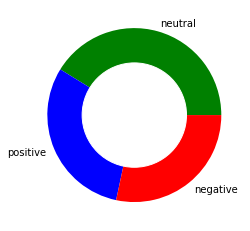

In [91]:
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
my_circle = plt.Circle( (0,0), 0.6, color='white')

plt.pie(size, labels=names, colors=['green','blue','red'])

p=plt.gcf()

p.gca().add_artist(my_circle)

plt.show()

In [92]:
def create_wordcloud(text):
    
    mask = np.array(Image.open("/Users/ulasarikaya/Desktop/bulut.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    
    wc.generate(str(text))
    wc.to_file("/Users/ulasarikaya/Desktop/wc.png")
    
    print("Word Cloud Saved Successfully")
    path="/Users/ulasarikaya/Desktop/wc.png"
    display(Image.open(path))
    

Word Cloud Saved Successfully


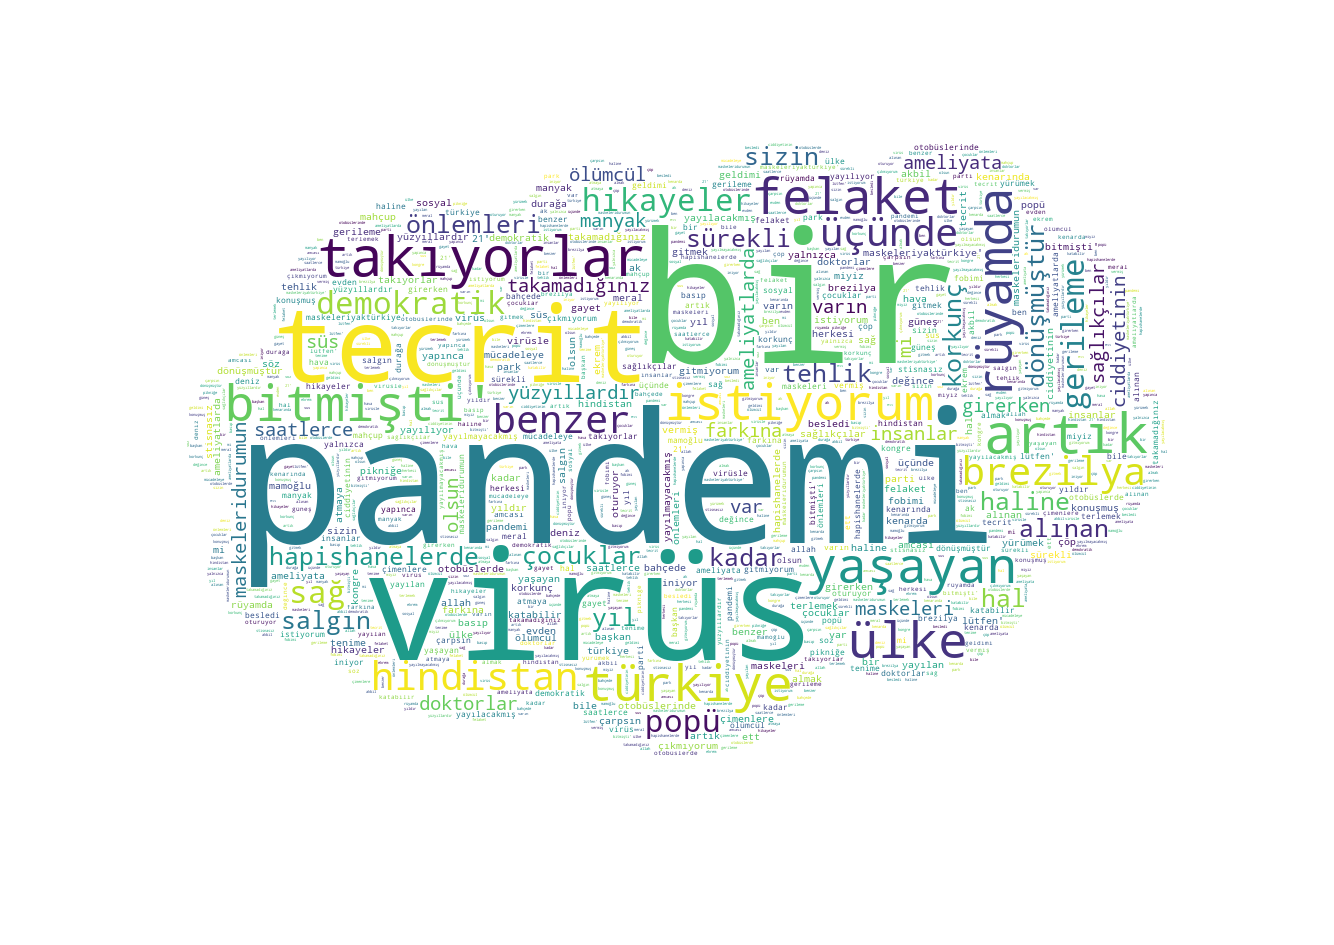

In [29]:
create_wordcloud(tw_list["text"].values) #for all tweets

Word Cloud Saved Successfully


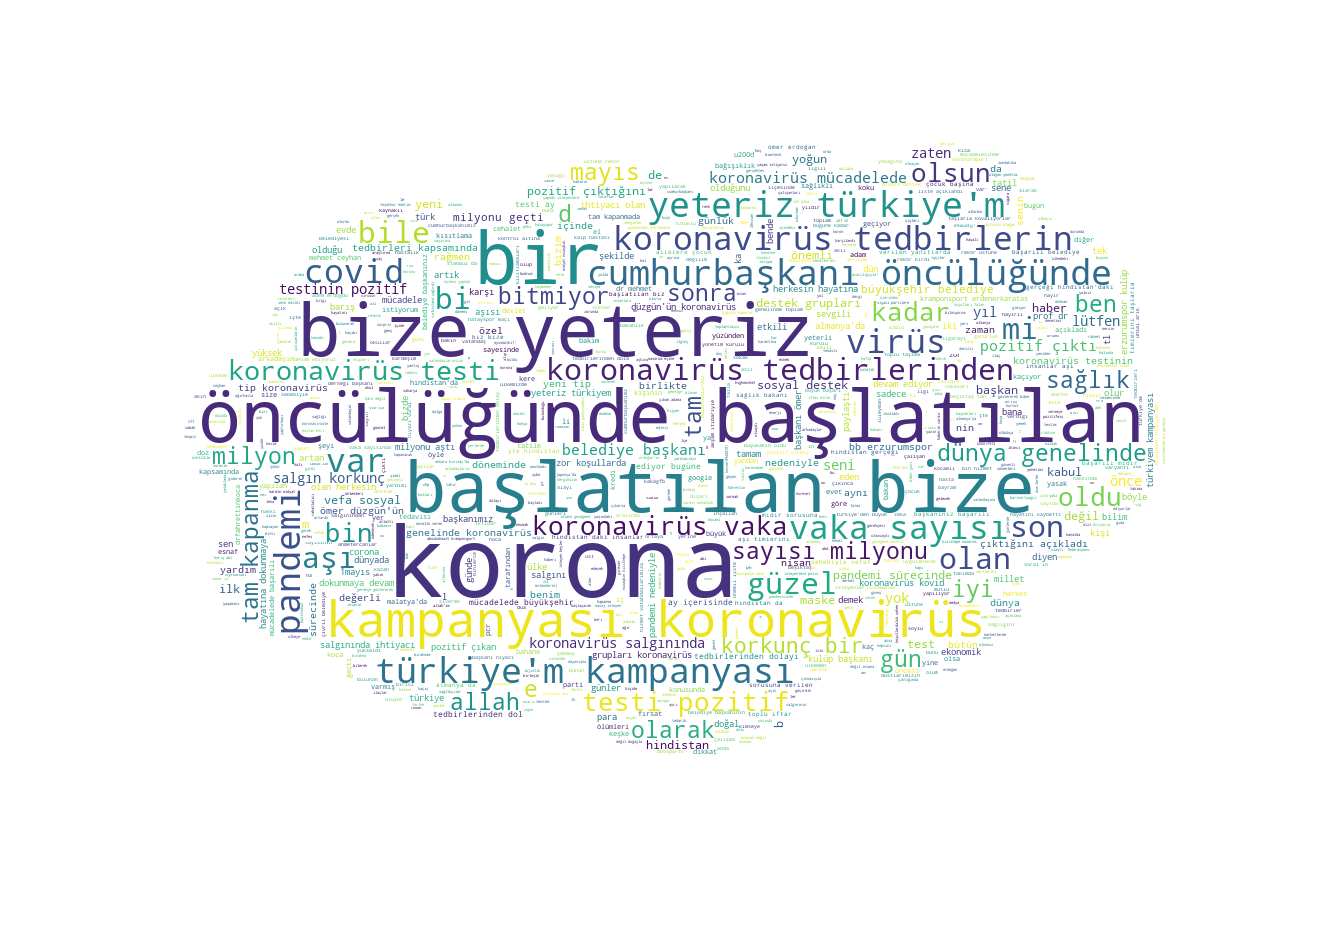

In [93]:
create_wordcloud(tw_list_positive["text"].values) #for positive sentiment

Word Cloud Saved Successfully


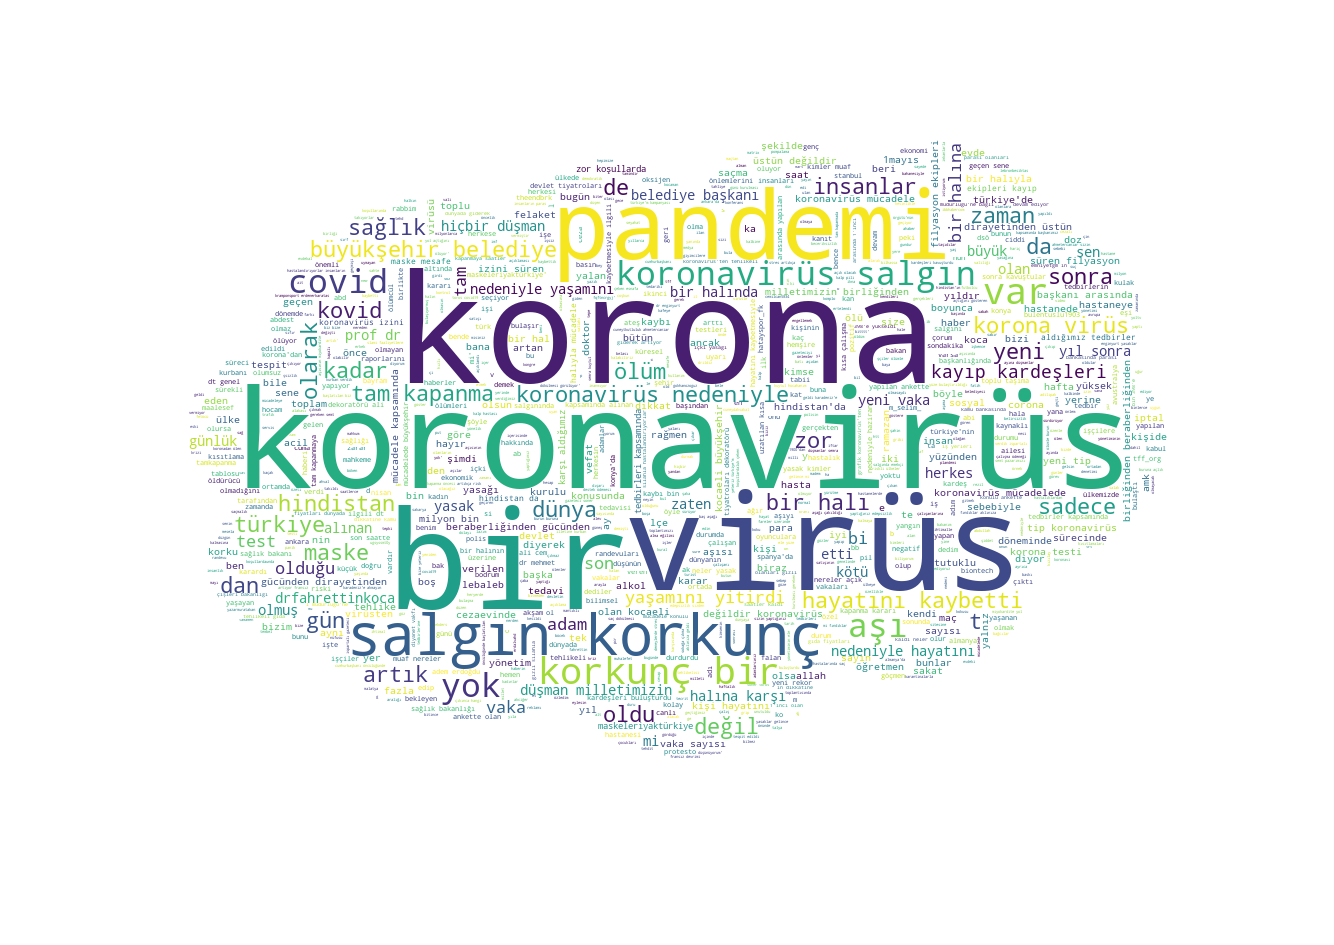

In [94]:
create_wordcloud(tw_list_negative["text"].values) #for neg sentiment

In [95]:
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [96]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_len.mean()),2)

text_len
sentiment          
negative     117.48
neutral      100.54
positive     111.28

In [97]:
import string 

stopword = nltk.corpus.stopwords.words('turkish')
ps = nltk.PorterStemmer()


def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [98]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])

print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

2158 Number of reviews has 10746 words


In [99]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

a  aa  aaa  aaaofewtx  aafguympmj  aavegbvj  ab  abbassir  abd  abdd  \
0  0  0   0    0          0           0         0   0         0    0     0   
1  2  0   0    0          0           0         0   0         0    0     0   
2  1  0   0    0          0           0         0   0         0    0     0   
3  0  0   0    0          0           0         0   0         0    0     0   
4  0  0   0    0          0           0         0   0         0    0     0   

   abdest  abdkirikci  abdli  abdnin  abdulhamitgul  abdullah  \
0       0           0      0       0              0         0   
1       0           0      0       0              0         0   
2       0           0      0       0              0         0   
3       0           0      0       0              0         0   
4       0           0      0       0              0         0   

   abdullahciftcib  abdurrahman  abehramoglu  abi  abim  abimi  abimiz  abisi  \
0                0            0            0    0     0      0       0      0   
1                0            0            0    0     0      0       0      0   
2                0            0            0    0     0      0       0      0   
3                0            0            0    0     0      0       0      0   
4                0            0            0    0     0      0       0      0   

   abisinden  abla  ablam  ablamın  abluka  abnin  aboubakmaz  abv  abwdolg  \
0          0     0      0        0       0      0           0    0        0   
1          0     0      0        0       0      0           0    0        0   
2          0     0      0        0       0      0           0    0        0   
3          0     0      0        0       0      0           0    0        0   
4          0     0      0        0       0      0           0    0        0   

   acal  acayanın  account  acel  acemilikl  aci  acil  acildi  acilen  \
0     0         0        0     0          0    0     0       0       0   
1     0         0        0     0          0    0     0       0       0   
2     0         0        0     0          0    0     0       0       0   
3     0         0        0     0          0    0     0       0       0   
4     0         0        0     0          0    0     0       0       0   

   acutchfi  acısı  acıtasyon  ad  adalet  adaletbakanlik  adaletistiyoruu  \
0         0      0          0   0       0               0                0   
1         0      0          0   0       0               0                0   
2         0      0          0   0       0               0                0   
3         0      0          0   0       0               0                0   
4         0      0          0   0       0               0                0   

   adaletsizlik  adam  adama  adambright  adamin  adamlar  adamlarsınız  \
0             0     0      0           0       0        0             0   
1             0     0      0           0       0        0             0   
2             0     0      0           0       0        0             0   
3             0     0      0           0       0        0             0   
4             0     0      0           0       0        0             0   

   adamları  adamların  adamlarınpandemi  adamsın  adamı  adana  adanademir  \
0         0          0                 0        0      0      0           0   
1         0          0                 0        0      0      0           0   
2         0          0                 0        0      0      0           0   
3         0          0                 0        0      0      0           0   
4         0          0                 0        0      0      0           0   

   adanaemniyeti  adanapost  adaplı  adapt  adasında  adcsqwkb  adem  \
0              0          0       0      0         0         0     0   
1              0          0       0      0         0         0     0   
2              0          0       0      0         0         0     0   
3              0          0       0      0         0    

In [109]:
#most used words

#count = pd.DataFrame(count_vect_df.sum())
#countdf = count.sort_values(0,ascending=False).head(20)

countdf[0:18]

0
koronavirü     811
korona         529
pandemi        229
virü           159
tam            138
yeni           119
covid          116
kampanyası     114
türkiyem       112
yeteriz        111
öncülüğünde    106
başlatılan     105
aşı            104
cumhurbaşkanı  102
sağlık          99

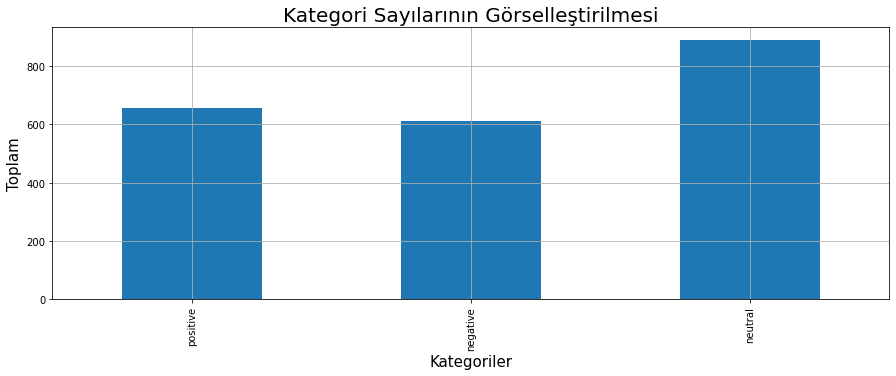

In [111]:
from collections import Counter


labels = Counter(tw_list['sentiment']).keys()
sum_ = Counter(tw_list['sentiment']).values()
df = pd.DataFrame(zip(labels,sum_), columns = ['sentiment', 'Toplam'])

df.plot(x = 'sentiment' , y = 'Toplam',kind = 'bar', legend = False, grid = True, figsize = (15,5))
plt.title('Kategori Sayılarının Görselleştirilmesi', fontsize = 20)
plt.xlabel('Kategoriler', fontsize = 15)
plt.ylabel('Toplam', fontsize = 15);

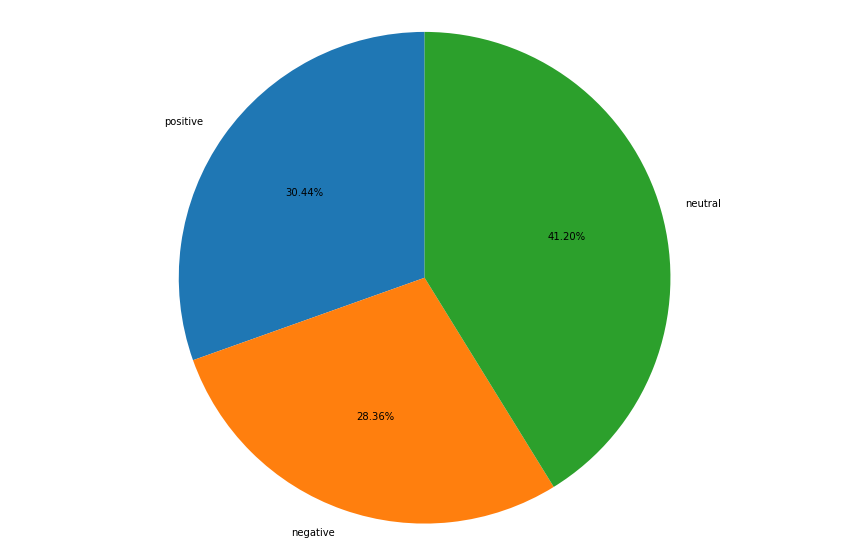

In [112]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.pie(df.Toplam, labels =df.sentiment, autopct = '%1.2f%%',  startangle = 90 )
ax.axis('equal')
plt.show()

# N-grams

In [113]:
words = clean_text(''.join(str(tw_list['text'].tolist())))

words[:10]

['rüyamda',
 'pandemi',
 'bitmişti',
 'pandemi',
 'felaket',
 'yaşayan',
 'ülke',
 'türkiy',
 'hindistan',
 'brezilya']

In [114]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[3:18]

(yeteriz, türkiyem)             109
(başlatılan, bize)              105
(öncülüğünde, başlatılan)       105
(cumhurbaşkanı, öncülüğünde)     97
(tam, kapanma)                   82
(korkunç, bir)                   75
(salgın, korkunç)                74
(koronavirü, tedbirlerin)        67
(koronavirü, salgın)             48
(tedbirleri, kapsamında)         47
(koronavirü, nedeniyl)           41
(tip, koronavirü)                37
(yeni, tip)                      37
(vaka, sayısı)                   36
(koronavirü, tedbirleri)         33
dtype: int64

Text(0.5, 0, 'Kelime Frekansı')

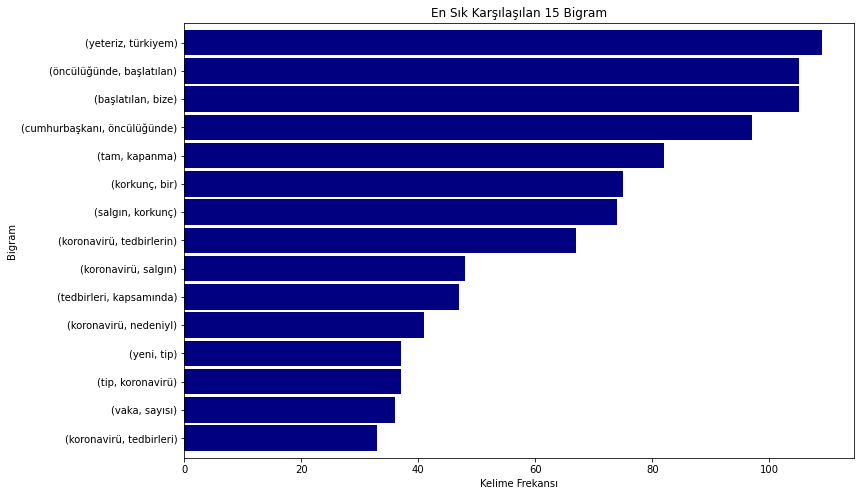

In [115]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[3:18]

bigrams_series.sort_values().plot.barh(color='navy', width=.9, figsize=(12, 8))
plt.title('En Sık Karşılaşılan 15 Bigram')
plt.ylabel('Bigram')
plt.xlabel('Kelime Frekansı')